In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('dataset-segmented-trimmed.csv', header=None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 25089 entries, 0 to 25088
dtypes: float64(25088), int64(1)
memory usage: 191.4 MB


In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,25088
0,0,0.000000,0.00000,0.0,0.000000,12.431628,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,7.742389,0.000000,0.0,0.0,0.0,0.0,0.0
2,0,0.000000,0.00000,0.0,8.859365,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,3.253726,0.0,0.0,0.0,0.0,0.0
3,0,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.0,8.434748,0.0,...,0.0,0.0,0.0,5.700318,0.000000,0.0,0.0,0.0,0.0,0.0
4,0,30.259119,45.62943,0.0,52.625065,0.000000,0.0,0.0,2.735458,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [5]:
y = df.iloc[:, 0].values

print("Shape of target vector : ",y.shape)

Shape of target vector :  (1000,)


In [6]:
column_numbers = [x for x in range(df.shape[1])]  # list of columns' integer indices

column_numbers.remove(0) #removing column integer index 0
Features= df.iloc[:, column_numbers] #return all columns except the 0th column

In [7]:
Features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 25088 entries, 1 to 25088
dtypes: float64(25088)
memory usage: 191.4 MB


In [8]:
X=Features.values

In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [10]:
# Train a Random Forest to determine feature importance
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X, y)

RandomForestClassifier(random_state=42)

In [11]:
# Get feature importances and select top 5000 features
feature_importances = random_forest.feature_importances_
top_5000_indices = np.argsort(feature_importances)[-5000:]  # Indices of top 5000 features
X_reduced = X[:, top_5000_indices]

In [12]:
feature_importances[:100]

array([8.79464872e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.96204137e-04, 0.00000000e+00,
       0.00000000e+00, 1.53984649e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.16519365e-05, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.22351949e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.32177907e-05, 2.98770564e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [13]:
top_5000_indices[:100]

array([7608, 7607, 7613, 7659, 7660, 7662, 7717, 7716, 7715, 7714, 7713,
       7712, 7718, 7711, 7709, 7708, 7707, 7706, 7704, 7703, 7710, 7702,
       7719, 7722, 7738, 7736, 7735, 7734, 7733, 7732, 7721, 7731, 7728,
       7727, 7726, 7725, 7724, 7723, 7730, 7578, 7701, 7699, 7677, 7676,
       7675, 7674, 7673, 7671, 7679, 7670, 7668, 7667, 7666, 7665, 7664,
       7663, 7669, 7700, 7680, 7682, 7698, 7697, 7696, 7695, 7693, 7692,
       7681, 7691, 7688, 7687, 7686, 7685, 7684, 7683, 7689, 7739, 7577,
       7575, 7454, 7455, 7456, 7458, 7459, 7460, 7461, 7462, 7465, 7467,
       7468, 7469, 7470, 7471, 7472, 7473, 7474, 7491, 7490, 7489, 7488,
       7486], dtype=int64)

In [14]:
# Save the reduced dataset to a new CSV file
reduced_df = pd.DataFrame(X_reduced)
reduced_df.insert(0, 'Target', y)  # Add the target column back
reduced_df.to_csv('reduced_dataset.csv', index=False, header=False)

In [15]:
reduced_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 5001 entries, Target to 4999
dtypes: float64(5000), int64(1)
memory usage: 38.2 MB


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Assuming X (features) and y (target) are already defined
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, stratify=y, random_state=42
)

# Display the number of samples and targets in each set
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


train_counts = dict(zip(*np.unique(y_train, return_counts=True)))
test_counts = dict(zip(*np.unique(y_test, return_counts=True)))


print(f"Training target distribution:\n{train_counts}")
print(f"Testing target distribution:\n{test_counts}")

Training samples: 800, Testing samples: 200
Training target distribution:
{0: 200, 1: 600}
Testing target distribution:
{0: 50, 1: 150}


In [17]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Display the classification report with 4 digits of precision
class_report = classification_report(y_test, y_pred, digits=4)
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[ 46   4]
 [  0 150]]

Classification Report:
              precision    recall  f1-score   support

           0     1.0000    0.9200    0.9583        50
           1     0.9740    1.0000    0.9868       150

    accuracy                         0.9800       200
   macro avg     0.9870    0.9600    0.9726       200
weighted avg     0.9805    0.9800    0.9797       200



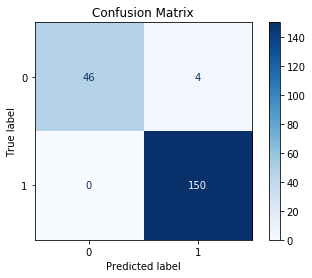

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline

# Use ConfusionMatrixDisplay for a visual representation
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues, values_format='d')  # 'd' ensures integer formatting
plt.title("Confusion Matrix")
plt.show()